In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
%matplotlib inline

df = pd.read_csv('../datasets/student-mat.csv')
df

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
5       GP   M   16       U     LE3       T     4     3  services     other   
6       GP   M   16       U     LE3       T     2     2     other     other   
7       GP   F   17       U     GT3       A     4     4     other   teacher   
8       GP   M   15       U     LE3       A     3     2  services     other   
9       GP   M   15       U     GT3       T     3     4     other     other   
10      GP   F   15       U     GT3       T     4     4   teacher    health   
11      GP   F   15       U     GT3       T     2     1  services     other   
12      GP   M   15       U     LE3       T     4     4    health  services   
13      GP   M   15       U     GT3       T     4     3   teacher     other   
14      GP   M   15       U     GT3       A     2     2     other     other   
15      GP   F   16       U     GT3       T     4     4    health     other   
16      GP   F   16       U     GT3       T     4     4  services  services   
17      GP   F   16       U     GT3       T     3     3     other     other   
18      GP   M   17       U     GT3       T     3     2  services  services   
19      GP   M   16       U     LE3       T     4     3    health     other   
20      GP   M   15       U     GT3       T     4     3   teacher     other   
21      GP   M   15       U     GT3       T     4     4    health    health   
22      GP   M   16       U     LE3       T     4     2   teacher     other   
23      GP   M   16       U     LE3       T     2     2     other     other   
24      GP   F   15       R     GT3       T     2     4  services    health   
25      GP   F   16       U     GT3       T     2     2  services  services   
26      GP   M   15       U     GT3       T     2     2     other     other   
27      GP   M   15       U     GT3       T     4     2    health  services   
28      GP   M   16       U     LE3       A     3     4  services     other   
29      GP   M   16       U     GT3       T     4     4   teacher   teacher   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
365     MS   M   18       R     GT3       T     1     3   at_home     other   
366     MS   M   18       U     LE3       T     4     4   teacher  services   
367     MS   F   17       R     GT3       T     1     1     other  services   
368     MS   F   18       U     GT3       T     2     3   at_home  services   
369     MS   F   18       R     GT3       T     4     4     other   teacher   
370     MS   F   19       U     LE3       T     3     2  services  services   
371     MS   M   18       R     LE3       T     1     2   at_home  services   
372     MS   F   17       U     GT3       T     2     2     other   at_home   
373     MS   F   17       R     GT3       T     1     2     other     other   
374     MS   F   18       R     LE3       T     4     4     other     other   
375     MS   F   18       R     GT3       T     1     1     other     other   
376     MS   F   20       U     GT3       T     4     2    health     other   
377     MS   F   18       R     LE3       T     4     4   teacher  services   
378     MS   F   18       U     GT3       T     3     3     other     other   
379     MS   F   17       R     GT3       T     3     1   at_home     other   
380     MS   M   18       U     GT3       T     4     4   teacher   teacher   
381     MS   M   18       R     GT3       T     2     1     other     other   
382     MS   M   17       U     GT3       T     2     3     other  services   
383     MS   M   19       R     GT3       T     1     

# What is the breakdown of alcohol consumption during the week?

(-1.117129202751001,
 1.1008156763214763,
 -1.1182581192328531,
 1.1124365705249155)

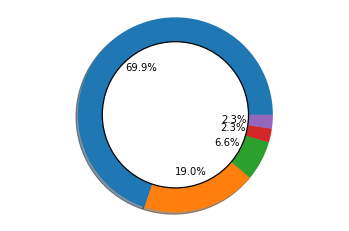

In [28]:

weekday_drunks = df['Dalc'].value_counts()
plt.pie(weekday_drunks.values, autopct='%1.1f%%', shadow=True)
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white', linewidth=1.25)

fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')

# What is the correlation between the amount of alcohol consumed by a student on a weekend and their likeliness to fail?

In [2]:
prudes = df[(df['Walc'] == 1) & (df['failures'] > 0)]
prudes.describe()

age      Medu       Fedu  traveltime  studytime   failures  \
count  24.000000  24.00000  24.000000   24.000000  24.000000  24.000000   
mean   17.416667   2.37500   2.208333    1.375000   2.083333   1.583333   
std     1.558055   1.13492   1.102533    0.494535   0.775532   0.829702   
min    15.000000   0.00000   1.000000    1.000000   1.000000   1.000000   
25%    16.000000   1.75000   1.000000    1.000000   2.000000   1.000000   
50%    18.000000   2.50000   2.000000    1.000000   2.000000   1.000000   
75%    19.000000   3.00000   3.000000    2.000000   2.250000   2.000000   
max    20.000000   4.00000   4.000000    2.000000   4.000000   3.000000   

          famrel   freetime      goout  Dalc  Walc     health   absences  \
count  24.000000  24.000000  24.000000  24.0  24.0  24.000000  24.000000   
mean    3.708333   3.041667   2.708333   1.0   1.0   3.500000   8.875000   
std     0.907896   1.398109   1.082636   0.0   0.0   1.103355  11.272562   
min     1.000000   1.000000   1.000000   1.0   1.0   1.000000   0.000000   
25%     3.000000   1.750000   2.000000   1.0   1.0   3.000000   0.000000   
50%     4.000000   3.000000   2.000000   1.0   1.0   3.000000   4.000000   
75%     4.000000   4.000000   4.000000   1.0   1.0   4.250000  14.250000   
max     5.000000   5.000000   5.000000   1.0   1.0   5.000000  40.000000   

              G1         G2         G3  
count  24.000000  24.000000  24.000000  
mean    9.208333   8.708333   7.916667  
std     3.374832   3.747221   5.081224  
min     4.000000   0.000000   0.000000  
25%     7.000000   7.000000   5.250000  
50%     8.000000   8.500000   9.500000  
75%    12.000000  11.250000  12.000000  
max    15.000000  14.000000  15.000000

### So the answer here is 24 prudes failed stuff, neat

In [3]:
less_prudes = df[(df['Walc'] == 2) & (df['failures'] > 0)]
less_prudes.describe()

age       Medu       Fedu  traveltime  studytime   failures  \
count  18.000000  18.000000  18.000000   18.000000  18.000000  18.000000   
mean   17.444444   2.166667   2.000000    1.500000   1.833333   1.444444   
std     1.338226   0.857493   0.970143    0.618347   0.707107   0.704792   
min    15.000000   1.000000   1.000000    1.000000   1.000000   1.000000   
25%    16.250000   2.000000   1.000000    1.000000   1.000000   1.000000   
50%    17.000000   2.000000   2.000000    1.000000   2.000000   1.000000   
75%    19.000000   3.000000   2.000000    2.000000   2.000000   2.000000   
max    19.000000   4.000000   4.000000    3.000000   3.000000   3.000000   

          famrel   freetime      goout       Dalc  Walc     health   absences  \
count  18.000000  18.000000  18.000000  18.000000  18.0  18.000000  18.000000   
mean    3.777778   3.222222   2.722222   1.444444   2.0   3.777778   5.055556   
std     0.942809   0.942809   1.017815   0.511310   0.0   1.437136   8.010818   
min     2.000000   2.000000   1.000000   1.000000   2.0   1.000000   0.000000   
25%     3.000000   3.000000   2.000000   1.000000   2.0   3.000000   0.000000   
50%     4.000000   3.000000   3.000000   1.000000   2.0   4.000000   0.000000   
75%     4.000000   4.000000   3.000000   2.000000   2.0   5.000000   7.250000   
max     5.000000   5.000000   5.000000   2.000000   2.0   5.000000  25.000000   

              G1         G2         G3  
count  18.000000  18.000000  18.000000  
mean    9.333333   7.722222   5.055556  
std     2.930569   3.675124   5.373926  
min     5.000000   0.000000   0.000000  
25%     7.000000   6.000000   0.000000  
50%     9.000000   9.000000   3.500000  
75%    11.500000  10.000000  10.500000  
max    15.000000  13.000000  13.000000

### 18 slightly less prude people failed stuff

In [4]:
normies = df[(df['Walc'] == 3) & (df['failures'] > 0)]
normies.describe()

age       Medu       Fedu  traveltime  studytime   failures  \
count  17.000000  17.000000  17.000000   17.000000  17.000000  17.000000   
mean   17.705882   2.000000   1.941176    1.588235   1.705882   1.588235   
std     1.759428   1.224745   1.144038    0.712287   0.685994   0.795206   
min    15.000000   1.000000   1.000000    1.000000   1.000000   1.000000   
25%    16.000000   1.000000   1.000000    1.000000   1.000000   1.000000   
50%    18.000000   1.000000   1.000000    1.000000   2.000000   1.000000   
75%    19.000000   3.000000   3.000000    2.000000   2.000000   2.000000   
max    21.000000   4.000000   4.000000    3.000000   3.000000   3.000000   

          famrel   freetime      goout       Dalc  Walc     health   absences  \
count  17.000000  17.000000  17.000000  17.000000  17.0  17.000000  17.000000   
mean    4.000000   3.352941   3.176471   2.000000   3.0   3.823529   8.529412   
std     0.866025   0.861770   1.014599   0.935414   0.0   1.185079   6.624931   
min     1.000000   2.000000   1.000000   1.000000   3.0   2.000000   0.000000   
25%     4.000000   3.000000   3.000000   1.000000   3.0   3.000000   4.000000   
50%     4.000000   3.000000   3.000000   2.000000   3.0   3.000000   8.000000   
75%     4.000000   4.000000   4.000000   3.000000   3.0   5.000000  14.000000   
max     5.000000   5.000000   5.000000   4.000000   3.0   5.000000  24.000000   

              G1         G2         G3  
count  17.000000  17.000000  17.000000  
mean    9.176471   9.058824   8.764706  
std     3.626901   3.249434   3.767118  
min     3.000000   5.000000   0.000000  
25%     7.000000   7.000000   8.000000  
50%     8.000000   9.000000   8.000000  
75%    11.000000  10.000000  10.000000  
max    18.000000  18.000000  18.000000

### 17 normies failed stuff

In [5]:
borderline_alcoholics = df[(df['Walc'] == 4) & (df['failures'] > 0)]
borderline_alcoholics.describe()

age       Medu      Fedu  traveltime  studytime   failures  \
count  14.000000  14.000000  14.00000   14.000000  14.000000  14.000000   
mean   16.571429   2.642857   2.50000    1.571429   1.642857   1.428571   
std     1.089410   1.008208   0.85485    0.755929   0.633324   0.646206   
min    15.000000   1.000000   1.00000    1.000000   1.000000   1.000000   
25%    16.000000   2.250000   2.00000    1.000000   1.000000   1.000000   
50%    17.000000   3.000000   2.00000    1.000000   2.000000   1.000000   
75%    17.000000   3.000000   3.00000    2.000000   2.000000   2.000000   
max    18.000000   4.000000   4.00000    3.000000   3.000000   3.000000   

          famrel   freetime      goout       Dalc  Walc     health   absences  \
count  14.000000  14.000000  14.000000  14.000000  14.0  14.000000  14.000000   
mean    3.928571   3.857143   4.357143   2.214286   4.0   4.142857  10.785714   
std     0.730046   0.949262   0.633324   0.801784   0.0   1.350621   9.374093   
min     3.000000   2.000000   3.000000   1.000000   4.0   1.000000   0.000000   
25%     3.250000   4.000000   4.000000   2.000000   4.0   3.250000   2.500000   
50%     4.000000   4.000000   4.000000   2.000000   4.0   5.000000   9.500000   
75%     4.000000   4.000000   5.000000   2.750000   4.0   5.000000  18.250000   
max     5.000000   5.000000   5.000000   4.000000   4.0   5.000000  28.000000   

              G1         G2         G3  
count  14.000000  14.000000  14.000000  
mean    7.642857   7.142857   6.714286  
std     2.134232   2.957575   3.561084  
min     5.000000   0.000000   0.000000  
25%     6.000000   6.000000   5.000000  
50%     6.500000   7.000000   8.000000  
75%     9.750000   9.000000   8.750000  
max    11.000000  12.000000  12.000000

### 14 borderline alcoholics failed stuff

In [6]:
alcoholics = df[(df['Walc'] == 5) & (df['failures'] > 0)]
alcoholics.describe()

age       Medu       Fedu  traveltime  studytime   failures  \
count  10.000000  10.000000  10.000000   10.000000  10.000000  10.000000   
mean   18.000000   1.900000   1.300000    1.900000   1.300000   2.100000   
std     1.943651   0.737865   0.483046    1.286684   0.483046   0.994429   
min    15.000000   1.000000   1.000000    1.000000   1.000000   1.000000   
25%    17.250000   1.250000   1.000000    1.000000   1.000000   1.000000   
50%    18.000000   2.000000   1.000000    1.000000   1.000000   2.500000   
75%    18.000000   2.000000   1.750000    2.750000   1.750000   3.000000   
max    22.000000   3.000000   2.000000    4.000000   2.000000   3.000000   

          famrel   freetime      goout      Dalc  Walc     health   absences  \
count  10.000000  10.000000  10.000000  10.00000  10.0  10.000000  10.000000   
mean    4.000000   3.800000   4.700000   2.80000   5.0   4.000000   5.300000   
std     1.247219   1.229273   0.483046   1.47573   0.0   1.414214   5.618422   
min     2.000000   2.000000   4.000000   1.00000   5.0   1.000000   0.000000   
25%     3.250000   3.000000   4.250000   2.00000   5.0   4.000000   0.000000   
50%     4.500000   4.000000   5.000000   2.50000   5.0   4.500000   5.000000   
75%     5.000000   5.000000   5.000000   3.75000   5.0   5.000000   9.000000   
max     5.000000   5.000000   5.000000   5.00000   5.0   5.000000  16.000000   

              G1         G2         G3  
count  10.000000  10.000000  10.000000  
mean    7.900000   8.900000   7.900000  
std     2.330951   2.469818   4.701064  
min     5.000000   5.000000   0.000000  
25%     6.000000   8.000000   7.250000  
50%     7.500000   8.500000   8.500000  
75%     9.000000   9.000000  10.000000  
max    12.000000  13.000000  14.000000

### 10 alcoholics failed stuff

### The data would suggest that there is a positive correlation between drinking a lot of alcohol on weekends and passing your classes

In [7]:
weekend_failures = {'Number of Students who Failed': [24, 18, 17, 14, 10], 'Alcohol Consumption': ['1', '2', '3', '4', '5']}
weekend_failures

{'Number of Students who Failed': [24, 18, 17, 14, 10],
 'Alcohol Consumption': ['1', '2', '3', '4', '5']}

In [8]:
weekend_failure_data = pd.DataFrame(weekend_failures, columns=['Number of Students who Failed', 'Alcohol Consumption'])
weekend_failure_data

Number of Students who Failed Alcohol Consumption
0                             24                   1
1                             18                   2
2                             17                   3
3                             14                   4
4                             10                   5

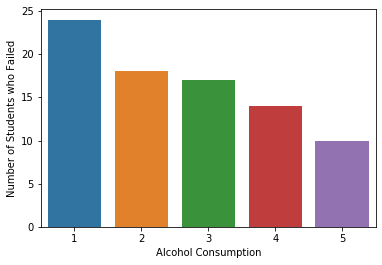

In [9]:
sns.barplot(x='Alcohol Consumption', y='Number of Students who Failed', data=weekend_failure_data)

# What is the correlation between the amount of alcohol consumed by a student on a weekday and their likeliness to fail?

In [10]:
prudes = df[(df['Dalc'] == 1) & (df['failures'] > 0)]
prudes.describe()

age       Medu       Fedu  traveltime  studytime   failures  \
count  44.000000  44.000000  44.000000   44.000000  44.000000  44.000000   
mean   17.500000   2.136364   1.977273    1.522727   1.954545   1.522727   
std     1.422412   1.025056   0.999736    0.730996   0.745671   0.792072   
min    15.000000   0.000000   1.000000    1.000000   1.000000   1.000000   
25%    16.000000   1.000000   1.000000    1.000000   1.000000   1.000000   
50%    18.000000   2.000000   2.000000    1.000000   2.000000   1.000000   
75%    19.000000   3.000000   3.000000    2.000000   2.000000   2.000000   
max    20.000000   4.000000   4.000000    4.000000   4.000000   3.000000   

          famrel   freetime      goout  Dalc       Walc     health   absences  \
count  44.000000  44.000000  44.000000  44.0  44.000000  44.000000  44.000000   
mean    3.863636   3.113636   2.909091   1.0   1.818182   3.750000   7.954545   
std     0.954571   1.185492   1.157748   0.0   1.126277   1.222369  10.067111   
min     1.000000   1.000000   1.000000   1.0   1.000000   1.000000   0.000000   
25%     3.750000   2.000000   2.000000   1.0   1.000000   3.000000   0.000000   
50%     4.000000   3.000000   3.000000   1.0   1.000000   4.000000   4.000000   
75%     4.000000   4.000000   4.000000   1.0   2.000000   5.000000  14.000000   
max     5.000000   5.000000   5.000000   1.0   5.000000   5.000000  40.000000   

              G1         G2         G3  
count  44.000000  44.000000  44.000000  
mean    8.909091   8.431818   7.340909  
std     3.408731   3.500151   4.969410  
min     3.000000   0.000000   0.000000  
25%     6.750000   7.000000   0.000000  
50%     8.000000   8.500000   8.500000  
75%    12.000000  11.000000  11.000000  
max    15.000000  14.000000  15.000000

### So the answer here is 44 prudes failed stuff, neat

In [11]:
less_prudes = df[(df['Dalc'] == 2) & (df['failures'] > 0)]
less_prudes.describe()

age   Medu       Fedu  traveltime  studytime   failures  \
count  25.000000  25.00  25.000000   25.000000  25.000000  25.000000   
mean   16.800000   2.28   2.240000    1.600000   1.640000   1.720000   
std     1.354006   1.10   1.128421    0.763763   0.637704   0.791623   
min    15.000000   1.00   1.000000    1.000000   1.000000   1.000000   
25%    16.000000   1.00   1.000000    1.000000   1.000000   1.000000   
50%    17.000000   2.00   2.000000    1.000000   2.000000   2.000000   
75%    18.000000   3.00   3.000000    2.000000   2.000000   2.000000   
max    19.000000   4.00   4.000000    4.000000   3.000000   3.000000   

          famrel   freetime      goout  Dalc       Walc     health   absences  \
count  25.000000  25.000000  25.000000  25.0  25.000000  25.000000  25.000000   
mean    3.560000   3.280000   3.600000   2.0   3.240000   3.880000   6.360000   
std     0.768115   0.979796   1.190238   0.0   1.051982   1.301281   7.262231   
min     2.000000   2.000000   1.000000   2.0   2.000000   1.000000   0.000000   
25%     3.000000   3.000000   3.000000   2.0   2.000000   3.000000   0.000000   
50%     4.000000   3.000000   4.000000   2.0   3.000000   4.000000   4.000000   
75%     4.000000   4.000000   5.000000   2.0   4.000000   5.000000  10.000000   
max     5.000000   5.000000   5.000000   2.0   5.000000   5.000000  24.000000   

              G1         G2         G3  
count  25.000000  25.000000  25.000000  
mean    8.440000   7.680000   6.320000  
std     2.973214   3.613862   4.793398  
min     6.000000   0.000000   0.000000  
25%     6.000000   6.000000   0.000000  
50%     7.000000   8.000000   8.000000  
75%    10.000000   9.000000   9.000000  
max    18.000000  18.000000  18.000000

### 25 slightly less prude people failed stuff

In [12]:
normies = df[(df['Dalc'] == 3) & (df['failures'] > 0)]
normies.describe()

age      Medu      Fedu  traveltime  studytime  failures  \
count   9.000000  9.000000  9.000000    9.000000   9.000000  9.000000   
mean   17.888889  2.222222  1.888889    1.555556   1.555556  1.555556   
std     1.833333  1.092906  1.054093    0.881917   0.726483  0.881917   
min    15.000000  1.000000  1.000000    1.000000   1.000000  1.000000   
25%    17.000000  1.000000  1.000000    1.000000   1.000000  1.000000   
50%    18.000000  2.000000  2.000000    1.000000   1.000000  1.000000   
75%    19.000000  3.000000  2.000000    2.000000   2.000000  2.000000   
max    21.000000  4.000000  4.000000    3.000000   3.000000  3.000000   

         famrel  freetime     goout  Dalc      Walc    health   absences  \
count  9.000000  9.000000  9.000000   9.0  9.000000  9.000000   9.000000   
mean   4.444444  4.222222  4.000000   3.0  3.777778  3.888889   9.888889   
std    0.527046  0.666667  0.707107   0.0  0.833333  1.364225   9.020039   
min    4.000000  3.000000  3.000000   3.0  3.000000  2.000000   0.000000   
25%    4.000000  4.000000  4.000000   3.0  3.000000  3.000000   4.000000   
50%    4.000000  4.000000  4.000000   3.0  4.000000  5.000000   6.000000   
75%    5.000000  5.000000  4.000000   3.0  4.000000  5.000000  15.000000   
max    5.000000  5.000000  5.000000   3.0  5.000000  5.000000  28.000000   

              G1         G2         G3  
count   9.000000   9.000000   9.000000  
mean    9.555556   9.000000   8.333333  
std     1.666667   1.936492   3.708099  
min     7.000000   7.000000   0.000000  
25%     8.000000   8.000000   8.000000  
50%    10.000000   9.000000   9.000000  
75%    11.000000   9.000000  10.000000  
max    12.000000  13.000000  14.000000

### 9 normies failed stuff

In [13]:
borderline_alcoholics = df[(df['Dalc'] == 4) & (df['failures'] > 0)]
borderline_alcoholics.describe()

age  Medu      Fedu  traveltime  studytime  failures    famrel  \
count   3.0   3.0  3.000000    3.000000   3.000000  3.000000  3.000000   
mean   18.0   3.0  2.333333    1.333333   1.666667  1.333333  4.666667   
std     2.0   1.0  0.577350    0.577350   0.577350  0.577350  0.577350   
min    16.0   2.0  2.000000    1.000000   1.000000  1.000000  4.000000   
25%    17.0   2.5  2.000000    1.000000   1.500000  1.000000  4.500000   
50%    18.0   3.0  2.000000    1.000000   2.000000  1.000000  5.000000   
75%    19.0   3.5  2.500000    1.500000   2.000000  1.500000  5.000000   
max    20.0   4.0  3.000000    2.000000   2.000000  2.000000  5.000000   

       freetime  goout  Dalc  Walc  health   absences         G1         G2  \
count  3.000000    3.0   3.0   3.0     3.0   3.000000   3.000000   3.000000   
mean   4.666667    4.0   4.0   4.0     4.0   9.666667   8.333333   8.666667   
std    0.577350    1.0   0.0   1.0     1.0   5.131601   2.081666   3.511885   
min    4.000000    3.0   4.0   3.0     3.0   4.000000   6.000000   5.000000   
25%    4.500000    3.5   4.0   3.5     3.5   7.500000   7.500000   7.000000   
50%    5.000000    4.0   4.0   4.0     4.0  11.000000   9.000000   9.000000   
75%    5.000000    4.5   4.0   4.5     4.5  12.500000   9.500000  10.500000   
max    5.000000    5.0   4.0   5.0     5.0  14.000000  10.000000  12.000000   

              G3  
count   3.000000  
mean    8.666667  
std     3.511885  
min     5.000000  
25%     7.000000  
50%     9.000000  
75%    10.500000  
max    12.000000

### 3 borderline alcoholics failed stuff

In [14]:
alcoholics = df[(df['Dalc'] == 5) & (df['failures'] > 0)]
alcoholics.describe()

age  Medu      Fedu  traveltime  studytime  failures   famrel  \
count   2.000000   2.0  2.000000    2.000000        2.0  2.000000  2.00000   
mean   20.000000   3.0  1.500000    1.500000        1.0  2.000000  3.50000   
std     2.828427   0.0  0.707107    0.707107        0.0  1.414214  2.12132   
min    18.000000   3.0  1.000000    1.000000        1.0  1.000000  2.00000   
25%    19.000000   3.0  1.250000    1.250000        1.0  1.500000  2.75000   
50%    20.000000   3.0  1.500000    1.500000        1.0  2.000000  3.50000   
75%    21.000000   3.0  1.750000    1.750000        1.0  2.500000  4.25000   
max    22.000000   3.0  2.000000    2.000000        1.0  3.000000  5.00000   

       freetime  goout  Dalc  Walc    health   absences         G1         G2  \
count  2.000000    2.0   2.0   2.0  2.000000   2.000000   2.000000   2.000000   
mean   4.500000    5.0   5.0   5.0  3.000000  13.000000   8.500000  10.500000   
std    0.707107    0.0   0.0   0.0  2.828427   4.242641   3.535534   3.535534   
min    4.000000    5.0   5.0   5.0  1.000000  10.000000   6.000000   8.000000   
25%    4.250000    5.0   5.0   5.0  2.000000  11.500000   7.250000   9.250000   
50%    4.500000    5.0   5.0   5.0  3.000000  13.000000   8.500000  10.500000   
75%    4.750000    5.0   5.0   5.0  4.000000  14.500000   9.750000  11.750000   
max    5.000000    5.0   5.0   5.0  5.000000  16.000000  11.000000  13.000000   

              G3  
count   2.000000  
mean   10.500000  
std     3.535534  
min     8.000000  
25%     9.250000  
50%    10.500000  
75%    11.750000  
max    13.000000

### 2 alcoholics failed stuff

### The data would suggest that there is a positive correlation between drinking a lot of alcohol on weekends and passing your classes

In [15]:
weekday_failures = {'Number of Students who Failed': [44, 25, 9, 3, 2], 'Alcohol Consumption': ['1', '2', '3', '4', '5']}
weekday_failures

{'Number of Students who Failed': [44, 25, 9, 3, 2],
 'Alcohol Consumption': ['1', '2', '3', '4', '5']}

In [16]:
weekday_failure_data = pd.DataFrame(weekday_failures, columns=['Number of Students who Failed', 'Alcohol Consumption'])
weekday_failure_data

Number of Students who Failed Alcohol Consumption
0                             44                   1
1                             25                   2
2                              9                   3
3                              3                   4
4                              2                   5

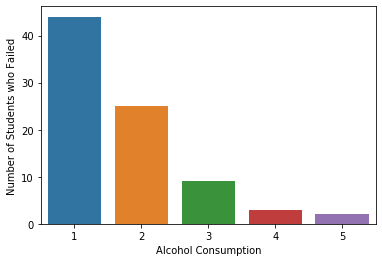

In [17]:
sns.barplot(x='Alcohol Consumption', y='Number of Students who Failed', data=weekday_failure_data)

# What is the correlation between family educational support and amount of alcohol consumed during the weekdays?

In [18]:
df['famsup'].value_counts()

yes    242
no     153
Name: famsup, dtype: int64

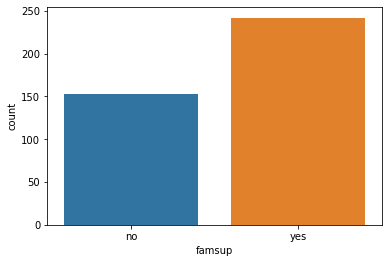

In [19]:
sns.countplot(x='famsup', data=df)

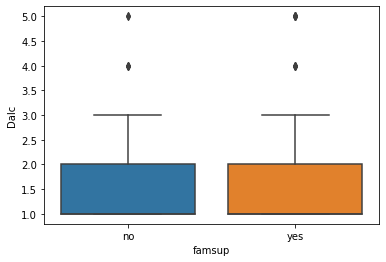

In [20]:
weekday = df.sort_values(by='Dalc', ascending=True)
ax = sns.boxplot(x='famsup', y='Dalc', data=weekday)

### There does not seem to be a correlation between alcohol consumption and family support.

# What is the correlation between quality of family relationships and the amount of alcohol consumed during the weekdays?

In [21]:
df['famrel'].value_counts()

4    195
5    106
3     68
2     18
1      8
Name: famrel, dtype: int64

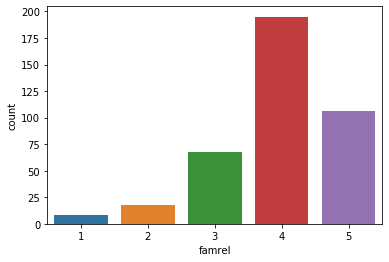

In [22]:
sns.countplot(x='famrel', data=df)

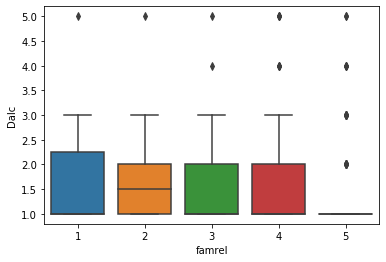

In [23]:
ax = sns.boxplot(x='famrel', y='Dalc', data=weekday)

### It seems the stronger the family relationship, the less alcohol they consume.

# Is there a correlation between the amount of study time and the amount of alcohol consumed during the weekdays?

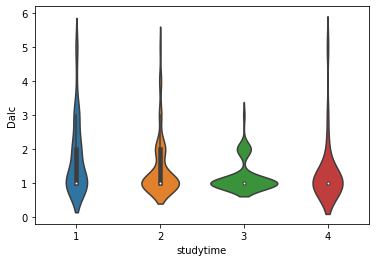

In [24]:
import numpy as np

study_drink = df
study_drink['studytime'] = study_drink['studytime'].apply(lambda x: np.int64(x))
sns.violinplot(x='studytime', y='Dalc', data=study_drink)
plt.show()

### It appears that a moderate studytime leads to the least likelyhood of becoming an alcoholic.